#Importando as Bibliotecas:

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

In [3]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [4]:
df = pd.read_html(request)

In [5]:
df1 = df[0]

In [6]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.175 ETH,-17.4%,NaN,852.25 ETH,"12,306.69 ETH",2650.0,0.2%,4870.0
1,2,Bored Ape Yacht Club,92.0 ETH,-4.5%,NaN,"919,908.0 ETH","1,207.09 ETH",6310.0,-0.1%,9999.0
2,3,Cool Pets,2.334 ETH,-13.4%,NaN,"42,385.44 ETH","1,007.5 ETH",10753.0,11.8%,18160.0
3,4,CloneX,14.5 ETH,-2.6%,NaN,"273,310.5 ETH",825.25 ETH,8259.0,0.4%,18849.0
4,5,Azuki,10.6 ETH,-9.3%,NaN,"106,000.0 ETH",817.38 ETH,5403.0,-0.1%,10000.0
5,6,Mutant Ape Yacht Club,19.694201 ETH,-7.7%,NaN,"353,589.68 ETH",581.84 ETH,11724.0,0.2%,17954.0
6,7,LAND,3.8 ETH,5.8%,NaN,"547,010.0 ETH",401.62 ETH,19643.0,2.0%,143950.0
7,8,Cool Cats,10.99 ETH,-2.5%,NaN,"109,163.67 ETH",279.05 ETH,5172.0,0.3%,9933.0
8,9,Zipcy's SuperNormal,1.044 ETH,-17.5%,NaN,"9,279.07 ETH",236.54 ETH,4943.0,-0.3%,8888.0
9,10,Doodles,13.2 ETH,-11.3%,NaN,"132,000.0 ETH",196.71 ETH,5987.0,0.1%,10000.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [7]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [8]:
dfs

[[     #                           NFT  ... 24h Owners Total Assets
  0   26                    VeeFriends  ...      -0.0%      10255.0
  1   27  Forgotten Runes Wizards Cult  ...       0.1%       9409.0
  2   28                 Boss Beauties  ...      -0.1%      10000.0
  3   29                 Chain Runners  ...      -0.2%      10000.0
  4   30                FVCK_CRYSTAL//  ...      -0.1%       4169.0
  5   31               Crypto Unicorns  ...       0.0%      10000.0
  6   32                 JRNY NFT Club  ...      -0.1%      10000.0
  7   33                       Blitmap  ...       1.5%       1700.0
  8   34                     LilHeroes  ...      -0.2%       7776.0
  9   35                      MetaHero  ...       2.0%       6457.0
  10  36                    FLUF World  ...       0.3%      10000.0
  11  37                     MekaVerse  ...      -0.2%       8888.0
  12  38               the littles nft  ...      -0.4%      10000.0
  13  39                X Rabbits Club  ...     

In [9]:
len(dfs)

4

In [10]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [11]:
len(datasets)

4

In [12]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [13]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.175 ETH,-17.4%,NaN,852.25 ETH,"12,306.69 ETH",2650.0,0.2%,4870.0
1,2,Bored Ape Yacht Club,92.0 ETH,-4.5%,NaN,"919,908.0 ETH","1,207.09 ETH",6310.0,-0.1%,9999.0
2,3,Cool Pets,2.334 ETH,-13.4%,NaN,"42,385.44 ETH","1,007.5 ETH",10753.0,11.8%,18160.0
3,4,CloneX,14.5 ETH,-2.6%,NaN,"273,310.5 ETH",825.25 ETH,8259.0,0.4%,18849.0
4,5,Azuki,10.6 ETH,-9.3%,NaN,"106,000.0 ETH",817.38 ETH,5403.0,-0.1%,10000.0
...,...,...,...,...,...,...,...,...,...,...
120,121,Lee Mullican,ETH,-100.0%,NaN,0.0 ETH,0.0 ETH,15.0,0.0%,16.0
121,122,Spirit Orb Pets,1.0 ETH,1771.0%,NaN,777.0 ETH,0.0 ETH,370.0,0.0%,777.0
122,123,United Punks Union,ETH,-100.0%,NaN,0.0 ETH,0.0 ETH,1192.0,0.0%,3624.0
123,124,Borpacasso,ETH,-100.0%,NaN,0.0 ETH,0.0 ETH,1149.0,-0.1%,2250.0


###Floor Price:

In [14]:
prices = []
for price in df_final['Floor Price']:
  price = price.split()
  if price[0] == 'ETH':
    price[0] = 0
    price.append('ETH')
  
  prices.append(price[0])

In [15]:
df_final['Floor Price'] = prices

In [16]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [17]:
df_final['Market Cap']

0         852.25 ETH
1      919,908.0 ETH
2      42,385.44 ETH
3      273,310.5 ETH
4      106,000.0 ETH
           ...      
120          0.0 ETH
121        777.0 ETH
122          0.0 ETH
123          0.0 ETH
124          0.0 ETH
Name: Market Cap, Length: 125, dtype: object

In [18]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [19]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [20]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [21]:
df_final['Market Cap'] = market_caps_final

In [22]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [23]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [24]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.175,-17.4%,NaN,852.25,"12,306.69 ETH",2650.0,0.2%,4870.0
1,2,Bored Ape Yacht Club,92.000,-4.5%,NaN,919908.0,"1,207.09 ETH",6310.0,-0.1%,9999.0
2,3,Cool Pets,2.334,-13.4%,NaN,42385.44,"1,007.5 ETH",10753.0,11.8%,18160.0
3,4,CloneX,14.500,-2.6%,NaN,273310.5,825.25 ETH,8259.0,0.4%,18849.0
4,5,Azuki,10.600,-9.3%,NaN,106000.0,817.38 ETH,5403.0,-0.1%,10000.0


In [25]:
tfhours = []
for per in df_final['24h(%)']:
  per = per.split('%')
  tfhours.append(float(per[0]))

In [26]:
df_final['24h(%)'] = tfhours

In [27]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.175,-17.4,NaN,852.25,"12,306.69 ETH",2650.0,0.2%,4870.0
1,2,Bored Ape Yacht Club,92.000,-4.5,NaN,919908.0,"1,207.09 ETH",6310.0,-0.1%,9999.0
2,3,Cool Pets,2.334,-13.4,NaN,42385.44,"1,007.5 ETH",10753.0,11.8%,18160.0
3,4,CloneX,14.500,-2.6,NaN,273310.5,825.25 ETH,8259.0,0.4%,18849.0
4,5,Azuki,10.600,-9.3,NaN,106000.0,817.38 ETH,5403.0,-0.1%,10000.0


###24h Volume:

In [28]:
df_final['24h Volume']

0      12,306.69 ETH
1       1,207.09 ETH
2        1,007.5 ETH
3         825.25 ETH
4         817.38 ETH
           ...      
120          0.0 ETH
121          0.0 ETH
122          0.0 ETH
123          0.0 ETH
124          0.0 ETH
Name: 24h Volume, Length: 125, dtype: object

In [29]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [30]:
daily_volumes
    

['12306.69',
 '1207.09',
 '1007.5',
 '825.25',
 '817.38',
 '581.84',
 '401.62',
 '279.05',
 '236.54',
 '196.71',
 '191.18',
 '152.24',
 '149.35',
 '113.75',
 '113.01',
 '98.51',
 '82.12',
 '82.07',
 '80.36',
 '68.73',
 '62.38',
 '62.1',
 '55.05',
 '50.6',
 '50.47',
 '49.8',
 '48.98',
 '47.99',
 '47.87',
 '46.92',
 '45.88',
 '44.14',
 '41.48',
 '38.82',
 '37.4',
 '35.54',
 '35.3',
 '34.47',
 '33.18',
 '33.0',
 '32.09',
 '30.87',
 '29.26',
 '27.08',
 '26.75',
 '25.95',
 '25.64',
 '25.07',
 '24.49',
 '23.98',
 '23.81',
 '23.02',
 '21.83',
 '21.06',
 '19.18',
 '17.38',
 '13.78',
 '13.39',
 '12.18',
 '8.56',
 '8.0',
 '7.46',
 '7.45',
 '7.17',
 '6.86',
 '6.5',
 '5.92',
 '5.85',
 '4.68',
 '4.67',
 '4.21',
 '3.63',
 '3.57',
 '3.47',
 '3.23',
 '3.15',
 '2.73',
 '2.62',
 '2.18',
 '1.97',
 '1.9',
 '1.76',
 '1.67',
 '1.6',
 '1.41',
 '1.36',
 '1.34',
 '1.2',
 '1.19',
 '1.18',
 '1.13',
 '0.73',
 '0.71',
 '0.66',
 '0.65',
 '0.51',
 '0.4',
 '0.36',
 '0.27',
 '0.27',
 '0.26',
 '0.26',
 '0.26',
 '0.25',

In [31]:
df_final['24h Volume'] = daily_volumes

In [32]:
df_final['24h Volume'].astype(float)

0      12306.69
1       1207.09
2       1007.50
3        825.25
4        817.38
         ...   
120        0.00
121        0.00
122        0.00
123        0.00
124        0.00
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [33]:
df_final['24h Owners']

0       0.2%
1      -0.1%
2      11.8%
3       0.4%
4      -0.1%
       ...  
120     0.0%
121     0.0%
122     0.0%
123    -0.1%
124     0.0%
Name: 24h Owners, Length: 125, dtype: object

In [34]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [35]:
df_final['24h Owners'] = daily_owners

In [36]:
df_final['24h Owners'].astype(float)

0       0.2
1      -0.1
2      11.8
3       0.4
4      -0.1
       ... 
120     0.0
121     0.0
122     0.0
123    -0.1
124     0.0
Name: 24h Owners, Length: 125, dtype: float64

##Razão dos proprietários (Owner Ratio):

In [37]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [38]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [39]:
df_final.isnull().sum()

#                 0
NFT               0
Floor Price       0
24h(%)            0
7d              125
Market Cap        0
24h Volume        0
Owners            0
24h Owners        0
Total Assets      0
Owner Ratio       0
dtype: int64

In [40]:
df_final.drop(columns=["7d", "#"], inplace=True)

In [41]:
df_final.duplicated().sum()

0

In [42]:
df = df_final

#Salvando em CSV:

In [43]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [44]:
df_test = pd.read_csv("df_final.csv")

In [45]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.175,-17.4,852.25,12306.69,2650.0,0.2,4870.0,54.414784
1,Bored Ape Yacht Club,92.000,-4.5,919908.00,1207.09,6310.0,-0.1,9999.0,63.106311
2,Cool Pets,2.334,-13.4,42385.44,1007.50,10753.0,11.8,18160.0,59.212555
3,CloneX,14.500,-2.6,273310.50,825.25,8259.0,0.4,18849.0,43.816648
4,Azuki,10.600,-9.3,106000.00,817.38,5403.0,-0.1,10000.0,54.030000


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [47]:
df = df_final.copy()

##Quais colunas nos interessam?

In [48]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets', 'Owner Ratio'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    float64
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
 8   Owner Ratio   125 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.9+ KB


In [50]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.175,-17.4,852.25,12306.69,2650.0,0.2,4870.0,54.414784
1,Bored Ape Yacht Club,92.000,-4.5,919908.0,1207.09,6310.0,-0.1,9999.0,63.106311
2,Cool Pets,2.334,-13.4,42385.44,1007.5,10753.0,11.8,18160.0,59.212555
3,CloneX,14.500,-2.6,273310.5,825.25,8259.0,0.4,18849.0,43.816648
4,Azuki,10.600,-9.3,106000.0,817.38,5403.0,-0.1,10000.0,54.030000


In [51]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,Lee Mullican,0.0,-100.0,0.0,0.0,15.0,0.0,16.0,93.750000
121,Spirit Orb Pets,1.0,1771.0,777.0,0.0,370.0,0.0,777.0,47.619048
122,United Punks Union,0.0,-100.0,0.0,0.0,1192.0,0.0,3624.0,32.891832
123,Borpacasso,0.0,-100.0,0.0,0.0,1149.0,-0.1,2250.0,51.066667
124,Pudgy Halloween,0.0,-100.0,0.0,0.0,1327.0,0.0,3.0,44233.333333


In [145]:
df.corr(method="pearson")

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
Floor Price,1.000000,-0.009783,0.877688,0.204931,0.030785,-0.022112
24h(%),-0.009783,1.000000,-0.020030,-0.093534,-0.044110,-0.061314
Market Cap,0.877688,-0.020030,1.000000,0.494651,0.448143,-0.026262
Owners,0.204931,-0.093534,0.494651,1.000000,0.725195,-0.090021
Total Assets,0.030785,-0.044110,0.448143,0.725195,1.000000,-0.078877
Owner Ratio,-0.022112,-0.061314,-0.026262,-0.090021,-0.078877,1.000000


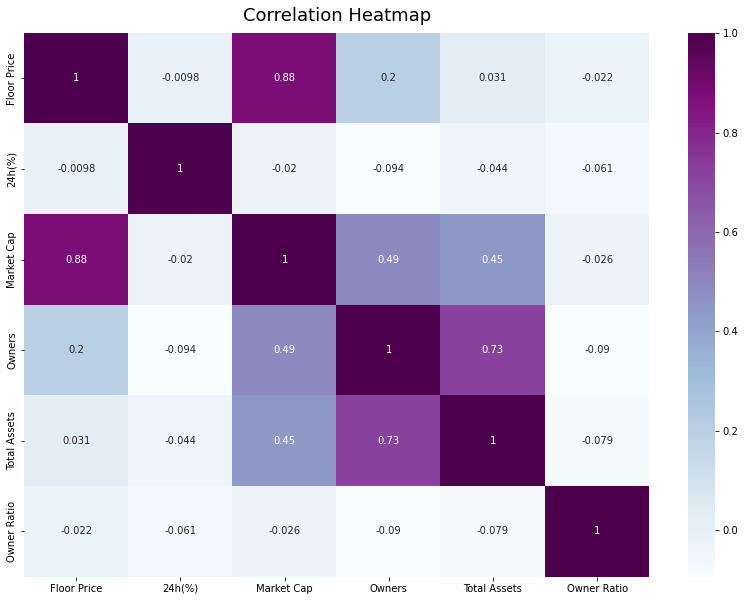

In [162]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##Análise de cada coluna:

###Floor Price:

In [52]:
df['Floor Price']

0       0.175
1      92.000
2       2.334
3      14.500
4      10.600
        ...  
120     0.000
121     1.000
122     0.000
123     0.000
124     0.000
Name: Floor Price, Length: 125, dtype: float64

In [53]:
df['Floor Price'].describe()

count    125.000000
mean       2.300862
std        8.704808
min        0.000000
25%        0.080000
50%        0.286000
75%        1.430000
max       92.000000
Name: Floor Price, dtype: float64

In [54]:
df2 = df[df['Floor Price'] < 80]

In [55]:
df2['Floor Price'].describe()

count    124.000000
mean       1.577482
std        3.232350
min        0.000000
25%        0.076250
50%        0.283000
75%        1.400000
max       19.694201
Name: Floor Price, dtype: float64

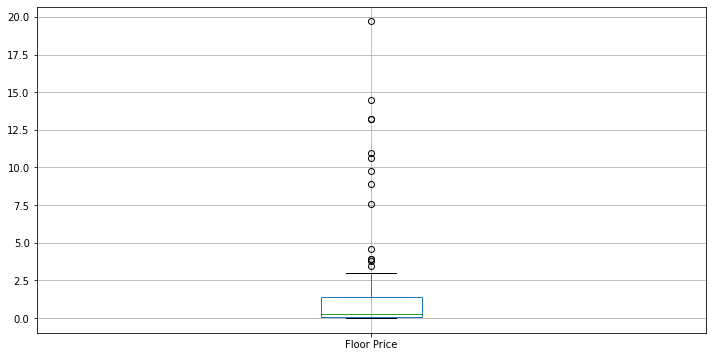

In [56]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


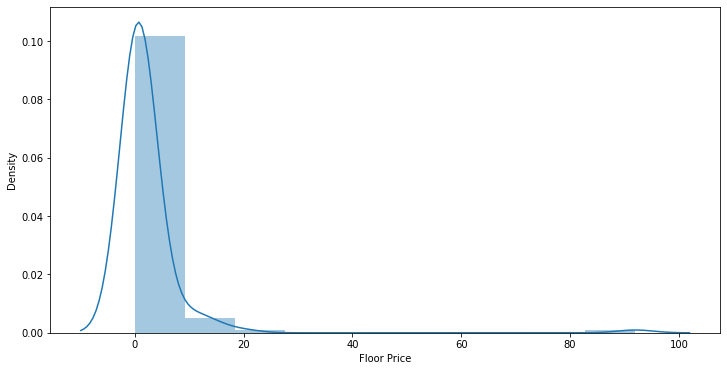

In [57]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

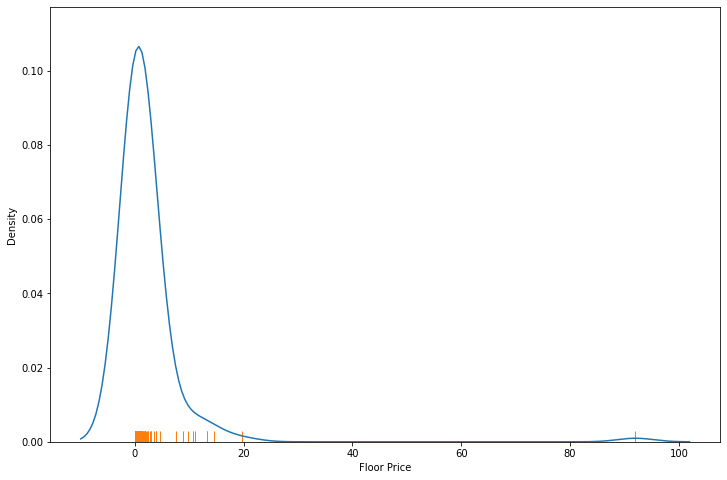

In [58]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

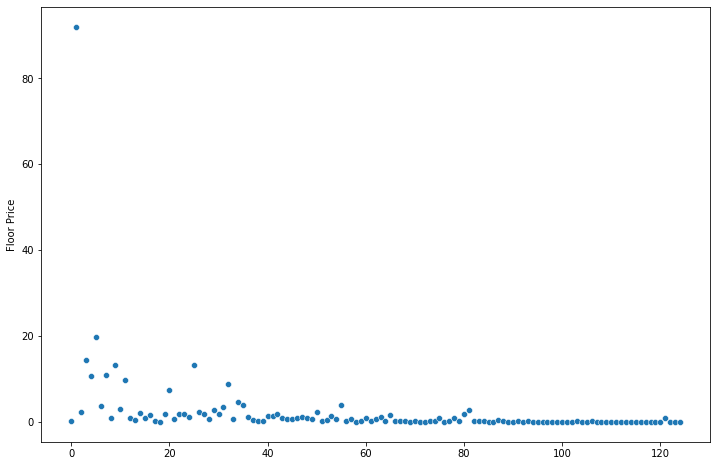

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

- As visualizações ajudam a gente perceber a distribuição concentrada entre 0 e 5 ETH. Lembrando que 1 ETH, atualmente (10/02/2022) está por volta de $3.000,00. O Floor Price é o valor mais baixo para alguém ser participante de um projeto NFT. Considerando que são os projetos mais valorizados, é natural que esses projetos tenham floor prices altos.

###

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [60]:
df['24h(%)'].describe()

count     125.000000
mean        9.193600
std       161.330439
min      -100.000000
25%       -11.000000
50%        -6.500000
75%         0.700000
max      1771.000000
Name: 24h(%), dtype: float64

In [61]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [62]:
df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [63]:
df_mean24h.describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.927661,134.872222,2839.555556,10354.388889,34.021416
std,2.118168,409.351551,2158.059565,10403.310447,15.881993
min,0.020000,10.600000,370.000000,777.000000,5.630000
25%,0.052500,16.375000,989.750000,5138.500000,31.040000
50%,0.117000,27.600000,2744.000000,8838.000000,36.121853
75%,0.882250,65.425000,3951.750000,10000.000000,44.319261
max,8.900000,1771.000000,8710.000000,46169.000000,54.944066


Essas informações são bem interessantes, válida para o dia 10/02/2022:
- 25 NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- 1.96 ETH é a média do Floor Price

####Visualização de dados:

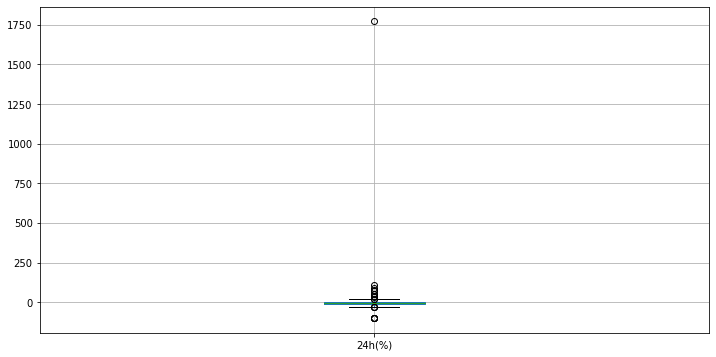

In [64]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

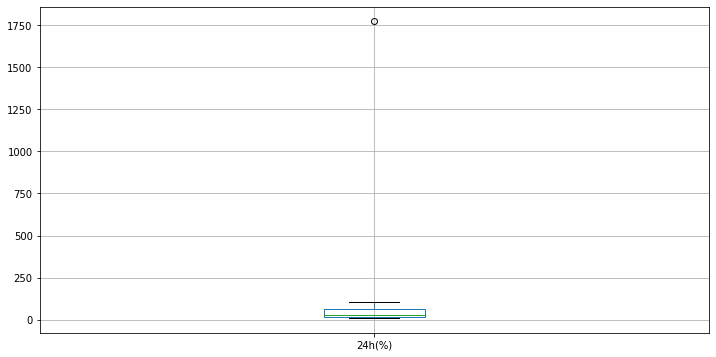

In [65]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


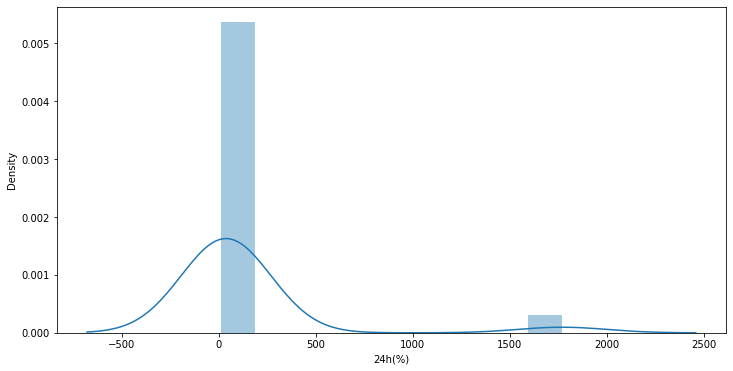

In [66]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

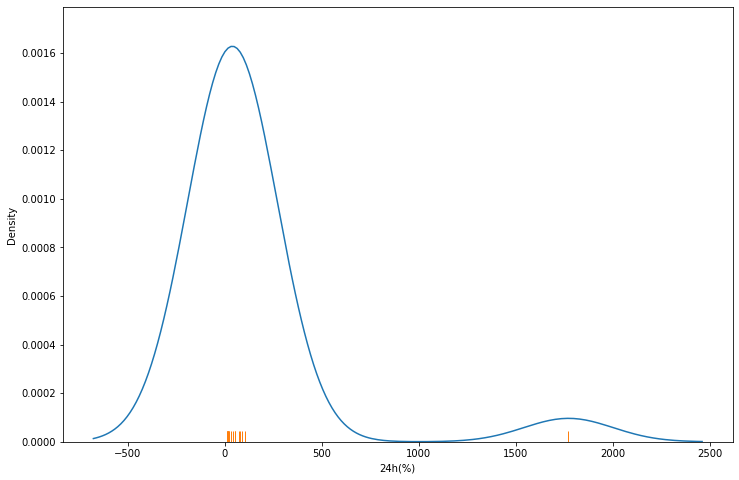

In [67]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

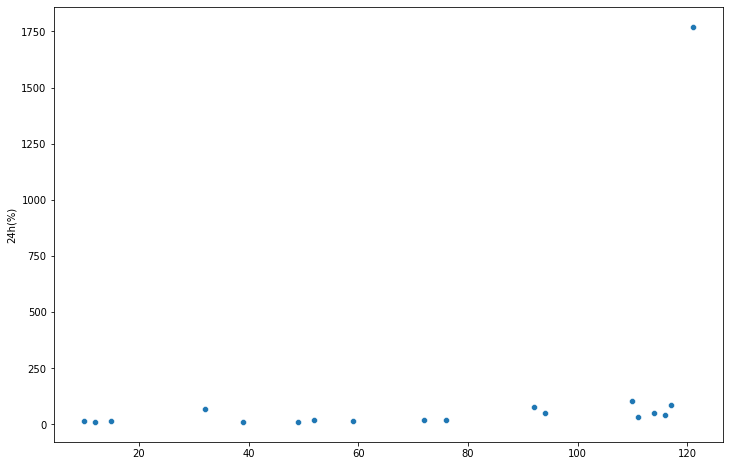

In [68]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


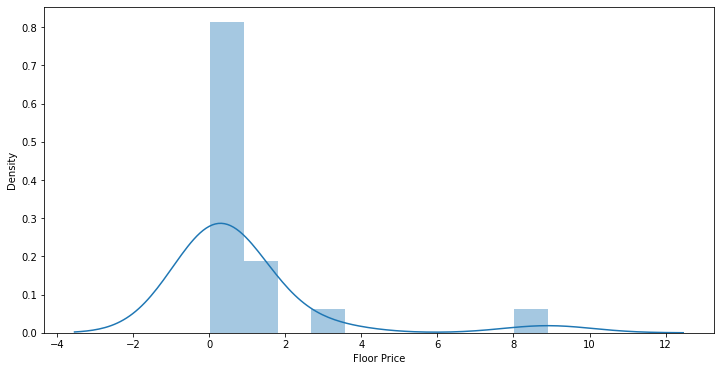

In [69]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

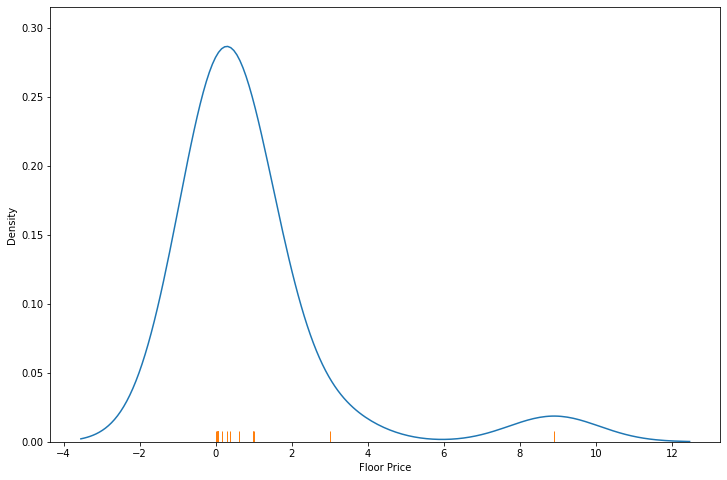

In [70]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

- O market cap é o que entenderíamos pela receita total do projeto. No entanto, muitos indicadores (incluindo a coingecko), simplesmente multiplicam a quantidade de NFTs (total assets) pelo preço do NFT mais baixo (floor price), o que significa que não é exatamente confiável. O market cap é o melhor parâmetro para entender o crescimento do projeto a longo prazo e o seu sucesso, porém, como tudo em finanças, não é uma medida exata, existem diversos outros fatores que garantem o sucesso de um projeto.

In [71]:
df['Market Cap'] = df['Market Cap'].astype(float)

In [72]:
df['Market Cap'].describe()

count       125.000000
mean      27659.500720
std      103697.204913
min           0.000000
25%         649.680000
50%        2179.780000
75%       13900.000000
max      919908.000000
Name: Market Cap, dtype: float64

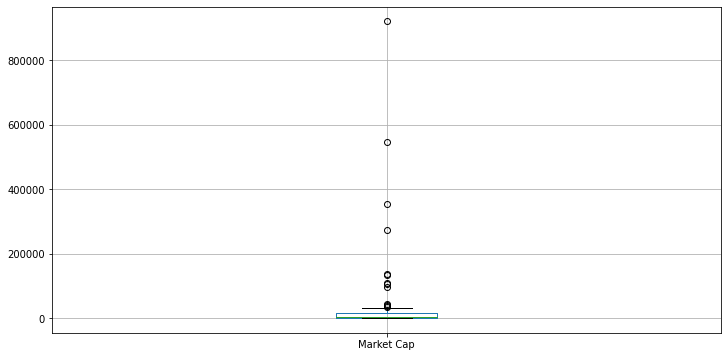

In [73]:
plt.figure(figsize=(12,6))
df.boxplot('Market Cap')
plt.show()

####Visualização de dados:

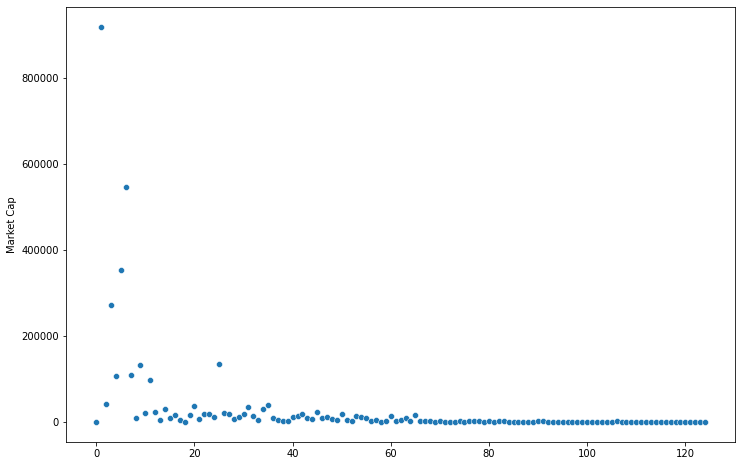

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Market Cap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


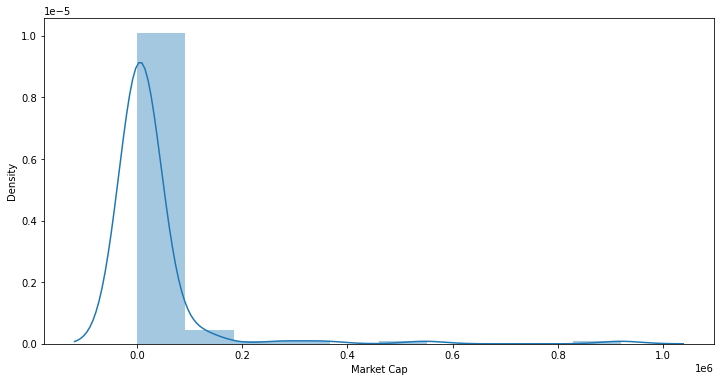

In [75]:
plt.figure(figsize=(12,6))
sns.distplot(df['Market Cap'], bins=10)

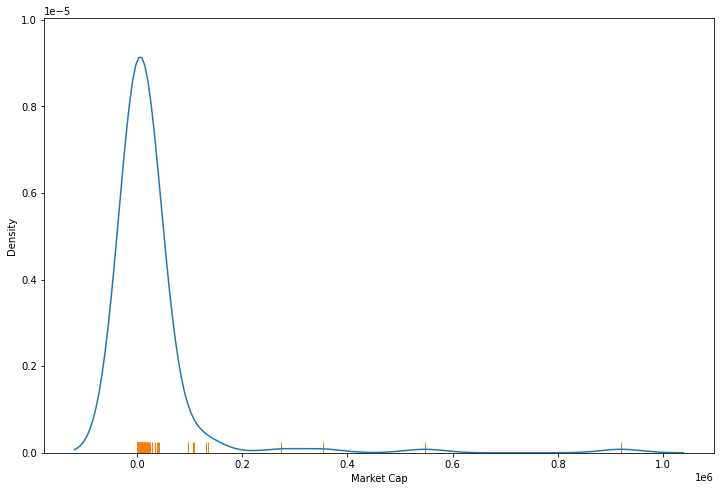

In [76]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Market Cap'])
sns.rugplot(df['Market Cap'])

A conclusão é que o Market Cap se mantém estável de um modo geral, tirando alguns Outliers acima de 20.000, ou ainda, podemos considerar que os Outliers se comprometem bastante acima do 3º Quartil (75%): 13587.1 ETH. Ainda mais quando se considera que a mediana é 2179 ETH, podemos entender que a maior parte dos projetos deve estar por volta desse valor.

In [201]:
df[df['Market Cap'] < 13587].describe()

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.423341,12.994624,2810.027957,3019.956989,8698.118280,571.066834
std,0.656407,186.947093,3504.628234,1816.923773,6200.226794,4610.132423
min,0.000000,-100.000000,0.000000,15.000000,3.000000,5.630000
25%,0.050000,-13.100000,399.000000,1717.000000,5000.000000,30.179164
50%,0.169000,-6.500000,1105.890000,2860.000000,8888.000000,38.546107
75%,0.610000,0.700000,4250.000000,4210.000000,10000.000000,49.527453
max,3.950000,1771.000000,12825.000000,9222.000000,46169.000000,44233.333333


In [202]:
df_cap = df[df['Market Cap'] < 13587]

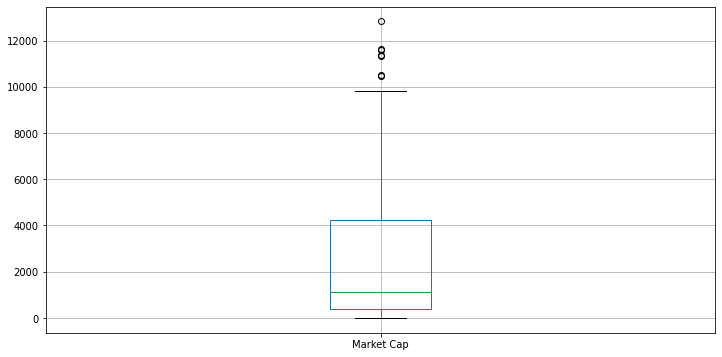

In [205]:
plt.figure(figsize=(12,6))
df_cap.boxplot('Market Cap')
plt.show()

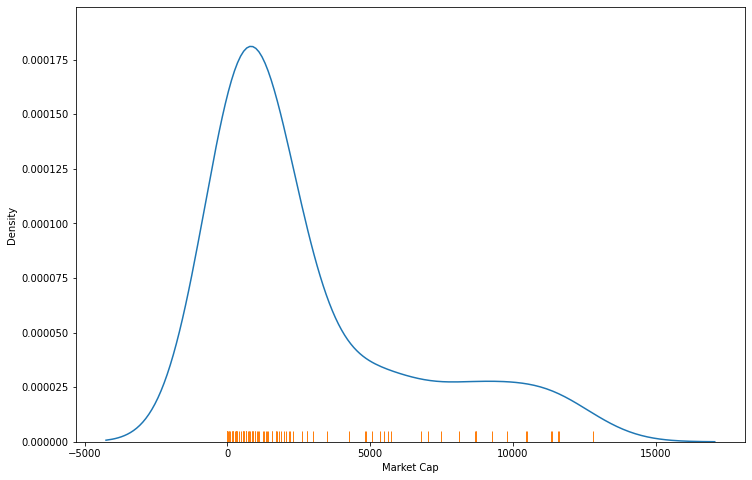

In [204]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_cap['Market Cap'])
sns.rugplot(df_cap['Market Cap'])

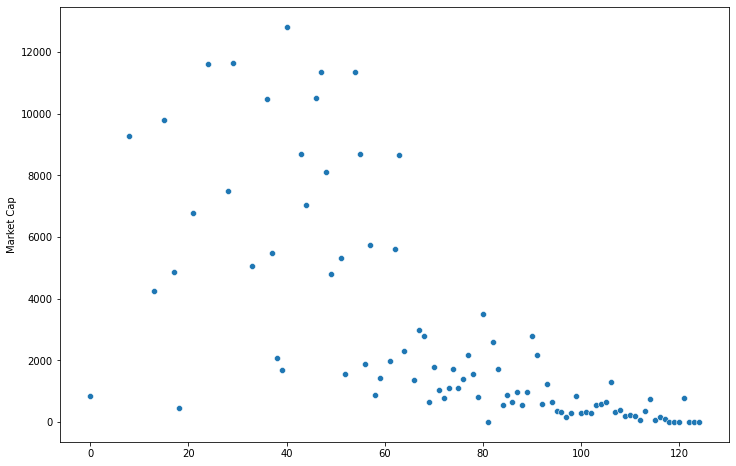

In [203]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cap['Market Cap'])

- Diante dos gráficos, conseguimos compreender que ainda existe uma boa dispersão acima de por volta de 3000 ETH de market cap. Os projetos acima disso, talvez sejam o que devam ter uma atenção interessante para um investidor.

###Owners

In [98]:
df['Owners'].head()

0     2650.0
1     6310.0
2    10753.0
3     8259.0
4     5403.0
Name: Owners, dtype: float64

In [99]:
df['Owners'].tail()

120      15.0
121     370.0
122    1192.0
123    1149.0
124    1327.0
Name: Owners, dtype: float64

In [78]:
df['Owners'].describe()

count      125.000000
mean      3616.400000
std       2657.392765
min         15.000000
25%       1853.000000
50%       3354.000000
75%       4982.000000
max      19643.000000
Name: Owners, dtype: float64

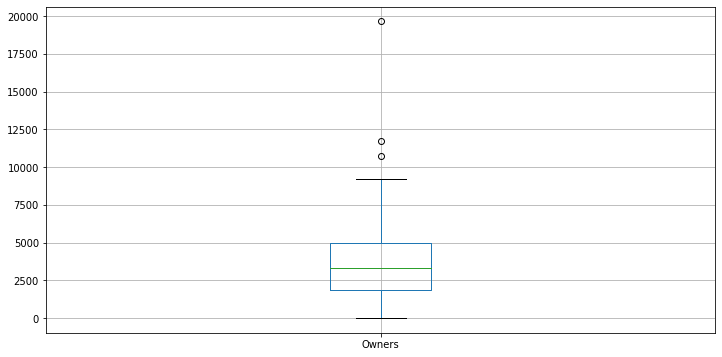

In [79]:
plt.figure(figsize=(12,6))
df.boxplot('Owners')
plt.show()

- Os proprietários do NFTs obedecem uma métrica muito mais concisa. O que isso nos indica? O fato é que um proprietário pode ter muitos NFTs e não possuímos esse número somente com essa feature. No entanto, o que podemos inferir é que os projetos que possuem muitos proprietários:
 - Estão completamente vendidos ou quase completamente.
 - Esses NFTs têm um preço baixo ou o projeto tem muita fama
 - Os projetos que têm poucos proprietários ou têm um preço alto ou têm pouco sucesso.

####Visualizações de dados:

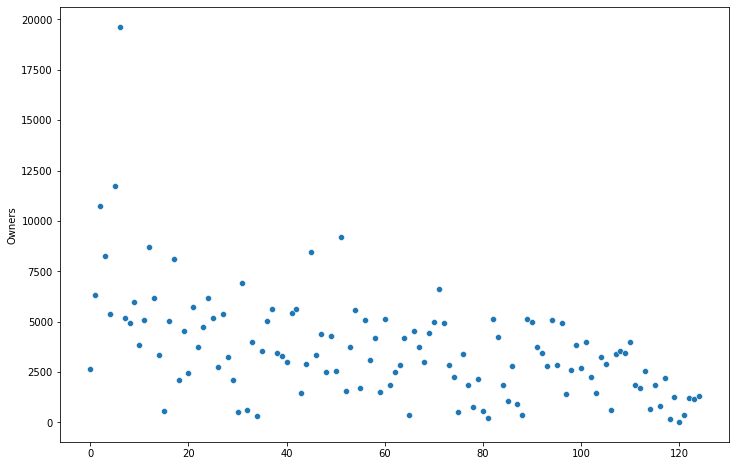

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Owners'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


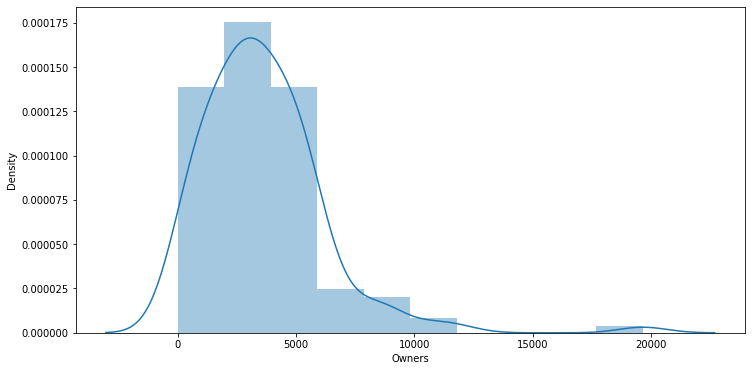

In [103]:
plt.figure(figsize=(12,6))
sns.distplot(df["Owners"], bins=10)

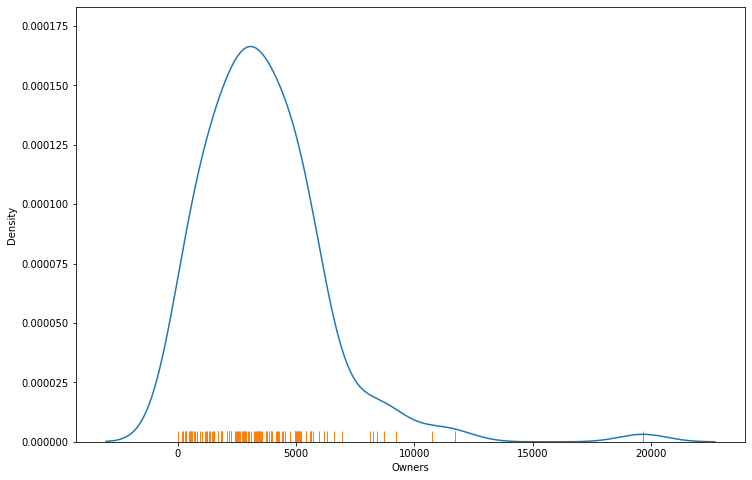

In [102]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Owners'])
sns.rugplot(df['Owners'])

###Total Assets

In [105]:
df['Total Assets'].head()

0     4870.0
1     9999.0
2    18160.0
3    18849.0
4    10000.0
Name: Total Assets, dtype: float64

In [106]:
df['Total Assets'].tail()

120      16.0
121     777.0
122    3624.0
123    2250.0
124       3.0
Name: Total Assets, dtype: float64

In [107]:
df['Total Assets'].describe()

count       125.000000
mean      10463.688000
std       13482.139516
min           3.000000
25%        6942.000000
50%        9933.000000
75%       10000.000000
max      143950.000000
Name: Total Assets, dtype: float64

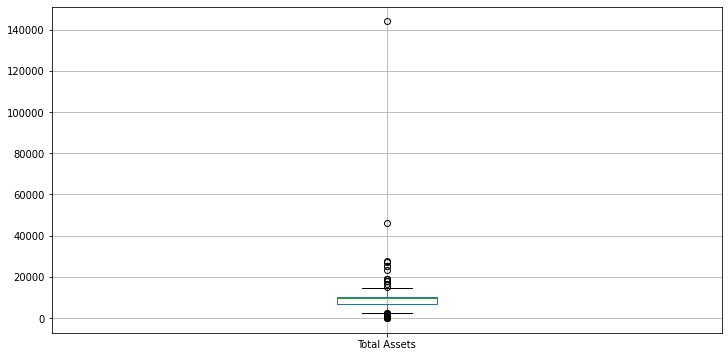

In [108]:
plt.figure(figsize=(12,6))
df.boxplot('Total Assets')
plt.show()

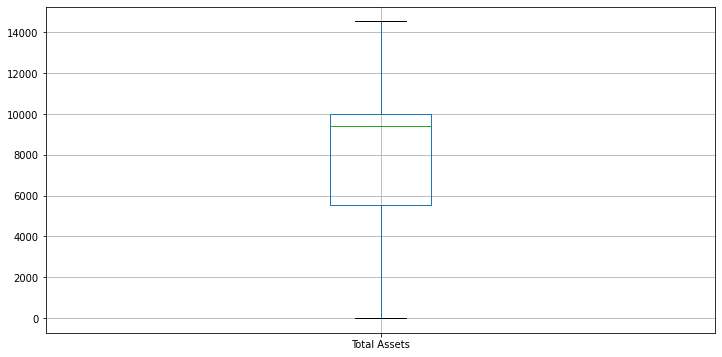

In [121]:
plt.figure(figsize=(12,6))
df[df['Total Assets'] < 15000].boxplot('Total Assets')
plt.show()

- A maior parte dos projetos tem até 15000 NFTs.

In [125]:
df_assets = df[df['Total Assets'] < 15000]
df_assets['Total Assets'].describe()

count      111.000000
mean      7796.729730
std       3168.589256
min          3.000000
25%       5552.000000
50%       9409.000000
75%      10000.000000
max      14533.000000
Name: Total Assets, dtype: float64

- 15 grandes outliers, ou seja, 15 projetos que tem uma quantidade NFTs que tão bem acima do 3º quartil. Ainda possuímos outliers com esse filtro, no entanto, é algo mais palatável.

####Visualização de dados:

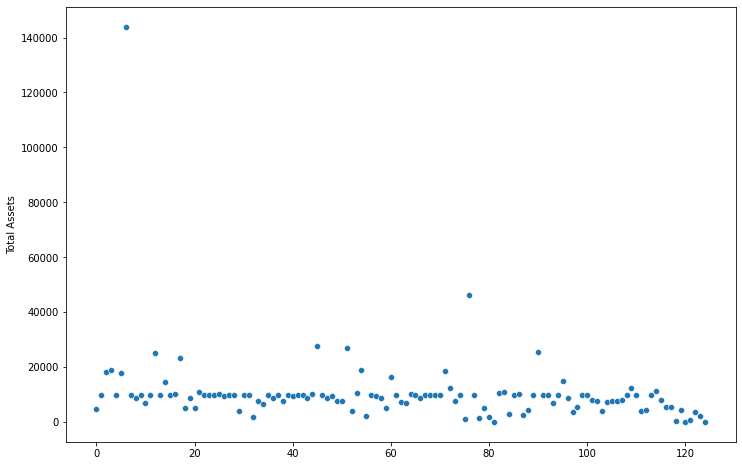

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Total Assets'])

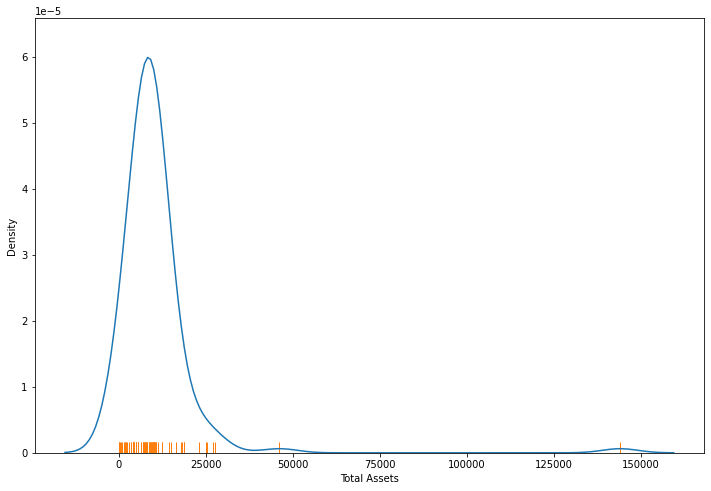

In [128]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Total Assets'])
sns.rugplot(df['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


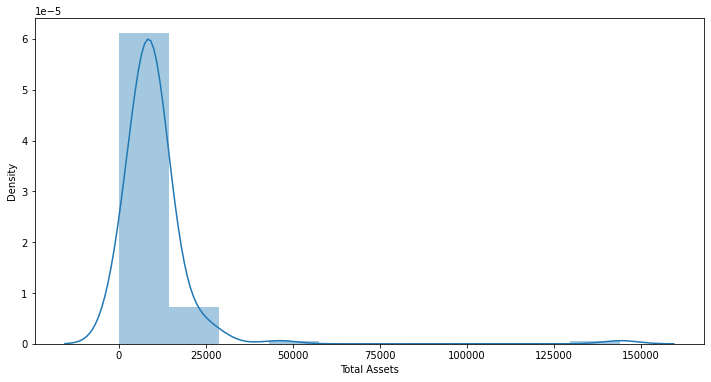

In [117]:
plt.figure(figsize=(12,6))
sns.distplot(df["Total Assets"], bins=10)

- Visualizações com filtragem feita:

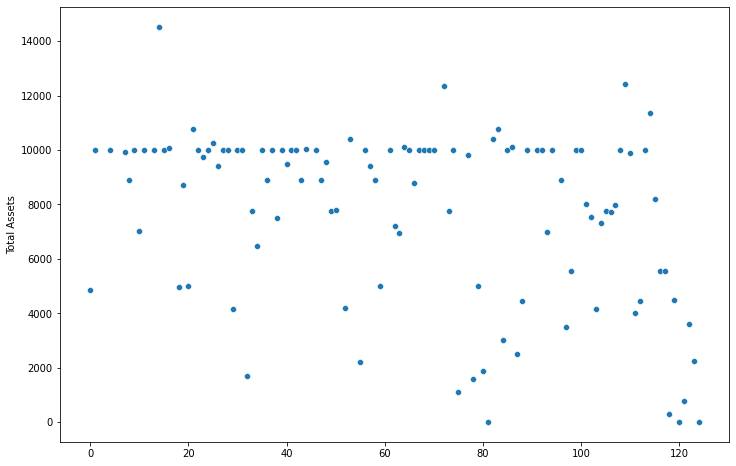

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_assets['Total Assets'])

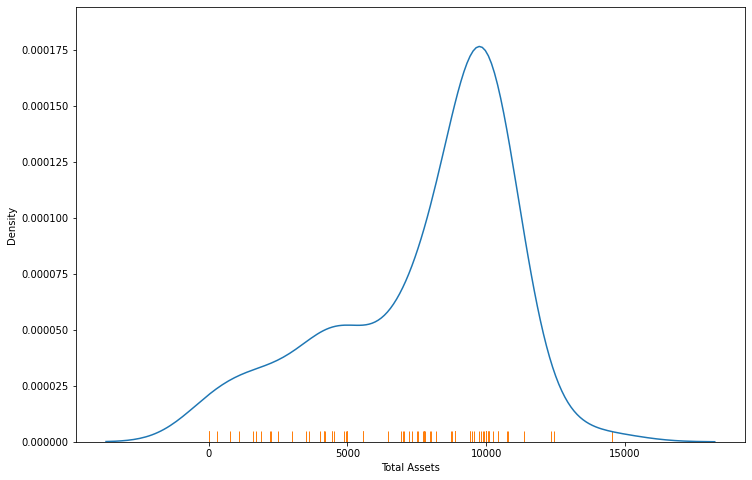

In [131]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_assets['Total Assets'])
sns.rugplot(df_assets['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


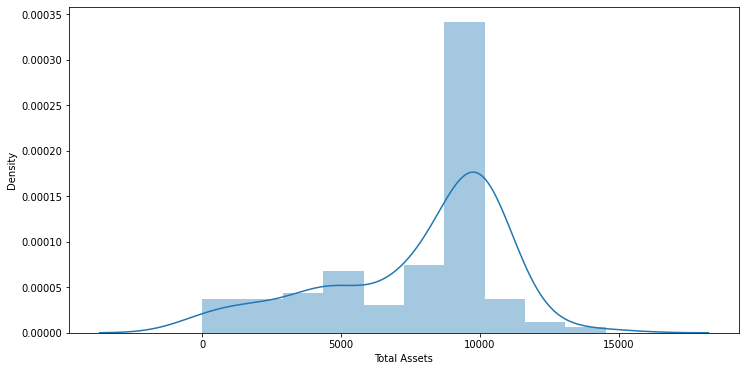

In [132]:
plt.figure(figsize=(12,6))
sns.distplot(df_assets["Total Assets"], bins=10)

- O interessante é pegarmos esses 14 projetos e entendê-los enquanto projetos que se distoam quanto a sua quantidade de NFTs, ver o seu Floor Price assim como a quantidade de Owners.

- A média de NFTs totais dos projetos é 7796. A maior parte dos projetos, no entanto se concentra em 9409 ~ 10.000 NFTs.

###Owner Ratio:

- Antes de analisarmos a proporção entre proprietários e total assets, é interessante fazer uma correlação entre essas duas variáveis.

In [139]:
df2 = pd.DataFrame([df['Owners'], df['Total Assets']])

In [140]:
df2.transpose().describe()

,Owners,Total Assets
count,125.000000,125.000000
mean,3616.400000,10463.688000
std,2657.392765,13482.139516
min,15.000000,3.000000
25%,1853.000000,6942.000000
50%,3354.000000,9933.000000
75%,4982.000000,10000.000000
max,19643.000000,143950.000000


In [137]:
df2.head()

,6,14,15,26,30,34,43,44,48,54,61,65,74,76,77,85,86,88,90,95,100,106,109,113,114,115,116,119
Owners,19643.0,3358.0,563.0,2747.0,519.0,311.0,1444.0,2884.0,2501.0,5575.0,1853.0,350.0,2258.0,3371.0,1864.0,1048.0,2783.0,350.0,4957.0,2860.0,2705.0,593.0,3447.0,2572.0,678.0,1843.0,813.0,1239.0
Total Assets,143950.0,14533.0,10000.0,9409.0,10000.0,6457.0,8888.0,10056.0,9546.0,18903.0,9999.0,10000.0,10000.0,46169.0,9811.0,10000.0,10100.0,4444.0,25455.0,15000.0,9999.0,7712.0,12442.0,10000.0,11357.0,8192.0,5555.0,4500.0


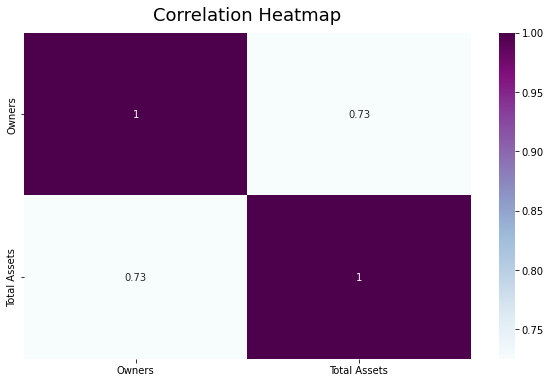

In [183]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df2.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlação forte! O que faz perfeito sentido quanto mais ativos determinado projeto tem, mais proprietários tal projeto terá. 

In [146]:
df3 = pd.DataFrame([df['Market Cap'], df['Total Assets']])

In [147]:
df3.transpose()

,Market Cap,Total Assets
0,852.25,4870.0
1,919908.00,9999.0
2,42385.44,18160.0
3,273310.50,18849.0
4,106000.00,10000.0
...,...,...
120,0.00,16.0
121,777.00,777.0
122,0.00,3624.0
123,0.00,2250.0


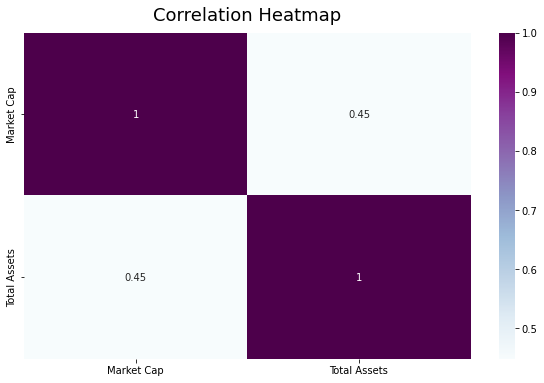

In [184]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df3.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlacionando os três:

In [175]:
df4 = pd.DataFrame([df['Owners'], df['Total Assets'], df['Market Cap']])

In [178]:
df4 = df4.transpose()

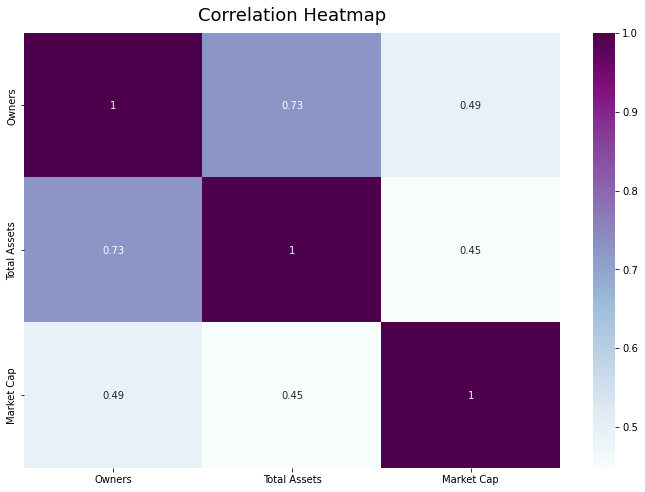

In [180]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df4.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

####Analisando o Owner Ratio propriamente:

In [187]:
df['Owner Ratio'].describe()

count      125.000000
mean       435.587236
std       3977.743701
min          3.500000
25%         30.400000
50%         39.500093
75%         50.960000
max      44233.333333
Name: Owner Ratio, dtype: float64

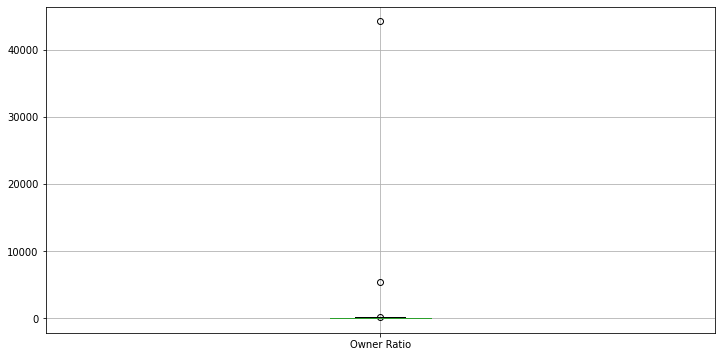

In [189]:
plt.figure(figsize=(12,6))
df.boxplot('Owner Ratio')
plt.show()

- Poucos outliers com considerações fortes.

In [196]:
df_ratio = df[df['Owner Ratio'] < 2500]
df_ratio

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.175,-17.4,852.25,12306.69,2650.0,0.2,4870.0,54.414784
1,Bored Ape Yacht Club,92.000,-4.5,919908.00,1207.09,6310.0,-0.1,9999.0,63.106311
2,Cool Pets,2.334,-13.4,42385.44,1007.5,10753.0,11.8,18160.0,59.212555
3,CloneX,14.500,-2.6,273310.50,825.25,8259.0,0.4,18849.0,43.816648
4,Azuki,10.600,-9.3,106000.00,817.38,5403.0,-0.1,10000.0,54.030000
...,...,...,...,...,...,...,...,...,...
119,Passive Apes,0.000,-100.0,0.00,0.0,1239.0,0.0,4500.0,27.533333
120,Lee Mullican,0.000,-100.0,0.00,0.0,15.0,0.0,16.0,93.750000
121,Spirit Orb Pets,1.000,1771.0,777.00,0.0,370.0,0.0,777.0,47.619048
122,United Punks Union,0.000,-100.0,0.00,0.0,1192.0,0.0,3624.0,32.891832


In [198]:
df_ratio['Owner Ratio'].describe()

count    123.000000
mean      39.350172
std       16.028633
min        3.500000
25%       30.300000
50%       39.467051
75%       50.802003
max       93.750000
Name: Owner Ratio, dtype: float64

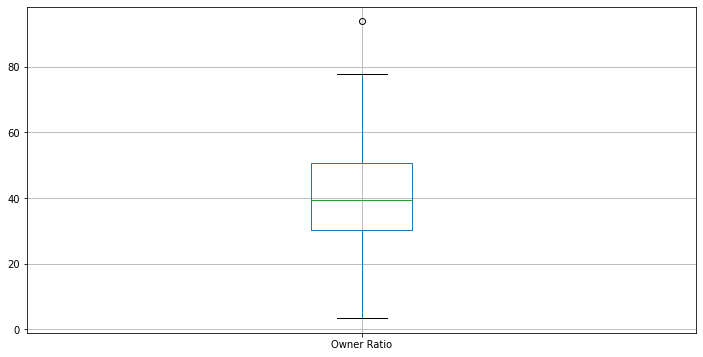

In [199]:
plt.figure(figsize=(12,6))
df_ratio.boxplot('Owner Ratio')
plt.show()

- O que isso significa? O owner ratio é a razão entre a quantidade de proprietários que o projeto possui / Quantidade de NFTs do projeto. Portanto, quanto mais próximo de 1, mais próximo o projeto está de ter vendido tudo de certo. No entanto, isso não significa que quanto mais distante de 1 menos  chances do projeto ter vendido todos seus NFTs, visto que um proprietário pode ter mais de um NFT.

#4ºParte: Analisando as relações do início:

##As relações:
- Fazer uma coluna chamada owners_ratio (total de owners / total de ativos).
- Filtrar os owners_ratio que tenham 10% ou menos.
- Fazer uma correlação com o floor price

In [80]:
df['Owners']

0       2650.0
1       6310.0
2      10753.0
3       8259.0
4       5403.0
        ...   
120       15.0
121      370.0
122     1192.0
123     1149.0
124     1327.0
Name: Owners, Length: 125, dtype: float64

In [81]:
df['Total Assets']

0       4870.0
1       9999.0
2      18160.0
3      18849.0
4      10000.0
        ...   
120       16.0
121      777.0
122     3624.0
123     2250.0
124        3.0
Name: Total Assets, Length: 125, dtype: float64

In [82]:
df['Owner Ratio'] = df['Owners'] / df ['Total Assets']

In [83]:
df['Owner Ratio'] = df['Owner Ratio']*100

In [84]:
df['Owner Ratio'].describe()

count      125.000000
mean       435.587236
std       3977.743701
min          3.500000
25%         30.400000
50%         39.500093
75%         50.960000
max      44233.333333
Name: Owner Ratio, dtype: float64

In [85]:
df[df['Owner Ratio'] <= 30].describe()

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.780671,-3.467857,25887.750000,2683.178571,16517.035714,17.727411
std,1.190177,25.040117,102520.742668,3594.927548,26202.090593,8.996814
min,0.000000,-100.000000,0.000000,311.000000,4444.000000,3.500000
25%,0.033750,-7.500000,504.125000,779.250000,9278.750000,7.829170
50%,0.170500,-3.550000,1854.400000,2061.000000,10000.000000,19.032875
75%,0.980000,3.550000,10185.450000,2866.000000,11628.250000,26.412768
max,4.600000,52.000000,547010.000000,19643.000000,143950.000000,29.492673


In [86]:
df_sold_in = df[df['Owner Ratio'] <= 30]

In [87]:
df_sold_in

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
6,LAND,3.8000,5.8,547010.00,401.62,19643.0,2.0,143950.0,13.645710
14,Decentral Games ICE Poker,2.0400,-4.0,29647.32,113.01,3358.0,0.0,14533.0,23.106035
15,Metroverse,0.9800,16.2,9800.00,98.51,563.0,-11.1,10000.0,5.630000
26,Forgotten Runes Wizards Cult,2.2900,-2.7,21546.61,48.98,2747.0,0.1,9409.0,29.195451
30,Crypto Unicorns,1.8900,1.0,18900.00,45.88,519.0,0.0,10000.0,5.190000
34,MetaHero,4.6000,-7.5,29702.20,37.4,311.0,2.0,6457.0,4.816478
43,Sneaky Vampire Syndicate,0.9800,-7.5,8710.24,27.08,1444.0,-0.8,8888.0,16.246625
44,BYO Land,0.7000,0.7,7039.20,26.75,2884.0,-0.2,10056.0,28.679395
48,loomlock NFT,0.8500,-18.9,8114.10,24.49,2501.0,-0.0,9546.0,26.199455
54,MoonCats - Acclimated,0.6000,3.0,11341.80,19.18,5575.0,0.1,18903.0,29.492673


###Fazendo relações com o floor price:

In [88]:
df_sold_in['Floor Price']

6      3.8000
14     2.0400
15     0.9800
26     2.2900
30     1.8900
34     4.6000
43     0.9800
44     0.7000
48     0.8500
54     0.6000
61     0.1979
65     1.7450
74     0.1730
76     0.0299
77     0.2200
85     0.0890
86     0.0650
88     0.1250
90     0.1100
95     0.0230
100    0.0290
106    0.1680
109    0.0150
113    0.0350
114    0.0650
115    0.0090
116    0.0300
119    0.0000
Name: Floor Price, dtype: float64

In [89]:
df_sold_in['Floor Price']

6      3.8000
14     2.0400
15     0.9800
26     2.2900
30     1.8900
34     4.6000
43     0.9800
44     0.7000
48     0.8500
54     0.6000
61     0.1979
65     1.7450
74     0.1730
76     0.0299
77     0.2200
85     0.0890
86     0.0650
88     0.1250
90     0.1100
95     0.0230
100    0.0290
106    0.1680
109    0.0150
113    0.0350
114    0.0650
115    0.0090
116    0.0300
119    0.0000
Name: Floor Price, dtype: float64

In [90]:
df_sold_in['Floor Price'] = df_sold_in['Floor Price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df3 = df_sold_in[df_sold_in['Floor Price'] < 22]

In [92]:
df3['Floor Price'].describe()

count    28.000000
mean      0.780671
std       1.190177
min       0.000000
25%       0.033750
50%       0.170500
75%       0.980000
max       4.600000
Name: Floor Price, dtype: float64

In [93]:
df2 = pd.DataFrame([df3['Owner Ratio'], df3['Floor Price']])

In [141]:
df2 = df2.transpose()

In [142]:
df2.corr(method="pearson")

,Owners,Total Assets
Owners,1.000000,0.725195
Total Assets,0.725195,1.000000
